In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1, analyze_expt2

import scipy.stats

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all, subjects, subject_cb, cue_level_names, image_type_names = analyze_expt1.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_supcat1, dprime_by_supcat1, rt_by_supcat1 = analyze_expt1.get_perf_by_supercateg()

acc_by_supcat2, dprime_by_supcat2, rt_by_supcat2 = analyze_expt2.get_perf_by_supercateg()


In [3]:
expt_names  = ['Color expt','Grayscale expt']

In [4]:
is_natural = np.array([1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1]).astype(bool)
kind_names = ['Artificial','Natural']
n_kinds = len(kind_names)


#### Plotting params

In [5]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.02, 0.02]

In [6]:
names1 = super_names[is_natural]
sorder1 = np.argsort([n[0] for n in names1])

names2 = super_names[~is_natural]
sorder2 = np.argsort([n[0] for n in names2])

super_plot_order = np.array(list(np.where(is_natural)[0][sorder1]) + \
                            list(np.where(~is_natural)[0][sorder2]))
super_plot_order

nat_colors = cm.Greens(np.linspace(0,1,6))[[2,4],:]
colors_plot = nat_colors[is_natural[super_plot_order].astype(int),:]

#### Plotting accuracy for some individual categories
all conditions

True
True


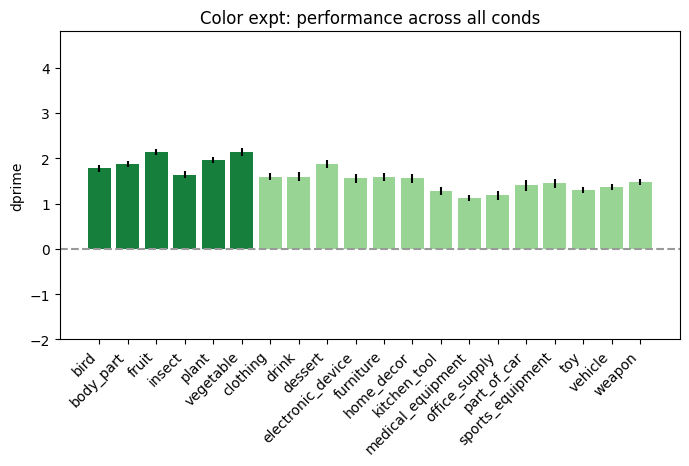

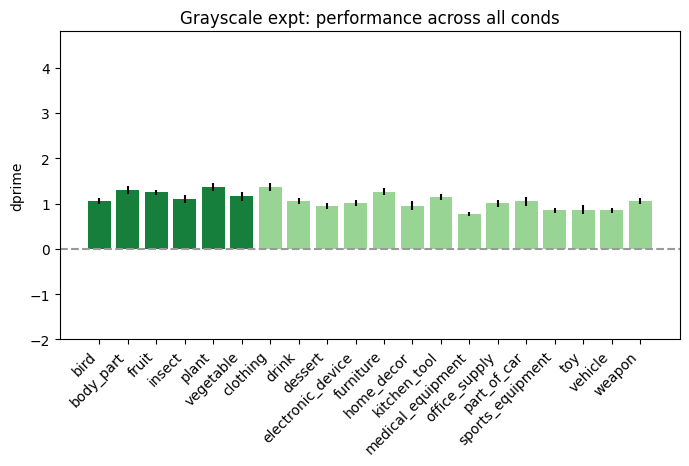

In [7]:
for ename, vals in zip(expt_names, [dprime_by_supcat1, dprime_by_supcat2]):

    plot_vals = [np.mean(np.mean(v, axis=1), axis=1) for v in vals]
    
    out = scipy.stats.ttest_1samp(plot_vals[0], popmean=0, axis=0, alternative='greater')
    p1 = out.pvalue
    out = scipy.stats.ttest_1samp(plot_vals[1], popmean=0, axis=0, alternative='greater')
    p2 = out.pvalue
    p = np.concatenate([p1, p2], axis=0)
    is_sig = p[super_plot_order]<0.01
    print(np.all(is_sig))
    
    meanvals = [np.mean(v, axis=0) for v in plot_vals] 
    semvals = [np.std(v, axis=0)/np.sqrt(v.shape[0]) for v in plot_vals]

    meanvals = np.concatenate(meanvals, axis=0)
    semvals = np.concatenate(semvals, axis=0)


    plt.figure(figsize=(8,4))

    plt.subplot(1,1,1)

    supnames = super_names

    plt.bar(np.arange(len(meanvals)), meanvals[super_plot_order], \
             color = colors_plot)
    #         color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])

    plt.errorbar(np.arange(len(meanvals)), meanvals[super_plot_order], \
                 semvals[super_plot_order], linestyle='none', color='k')

    
    asterisk_locs = np.arange(len(meanvals))[is_sig]
    asterisk_heights = meanvals[super_plot_order][is_sig] + \
                        semvals[super_plot_order][is_sig] + 0.20
#     plt.plot(asterisk_locs, asterisk_heights, '*', color='k')

        
    plt.axhline(0.0, color=[0.6, 0.6, 0.6], linestyle='--')
    plt.xticks(np.arange(len(meanvals)), supnames[super_plot_order], rotation=45, ha='right')
    plt.ylim([-2, 4.8])
    plt.ylabel('dprime')

    plt.title('%s: performance across all conds'%ename)

#### plot change from color to grayscale

Text(0, 0.5, 'dprime')

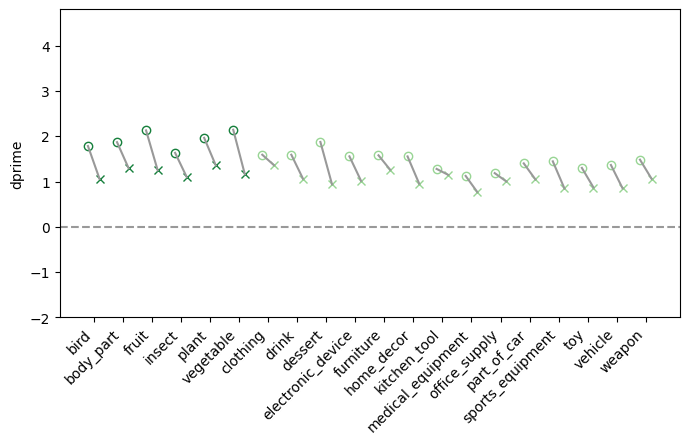

In [8]:
point_types = ['o','x']

plotvals = []

for ee, [ename, vals] in enumerate(zip(expt_names, [dprime_by_supcat1, dprime_by_supcat2])):

    plot_vals = [np.mean(np.mean(v, axis=1), axis=1) for v in vals]
    
    meanvals = [np.mean(v, axis=0) for v in plot_vals] 
    semvals = [np.std(v, axis=0)/np.sqrt(v.shape[0]) for v in plot_vals]

    meanvals = np.concatenate(meanvals, axis=0)
    semvals = np.concatenate(semvals, axis=0)

    plotvals += [meanvals]

plotvals = np.array(plotvals)

plotvals = plotvals[:,super_plot_order]

plt.figure(figsize=(8,4))

plt.subplot(1,1,1)

jitters = np.linspace(-0.2, 0.2, 2)

for xx in range(plotvals.shape[1]):

    for ee in range(2):
    
        plt.plot(xx+jitters[ee], plotvals[ee,xx], point_types[ee], 
             color = colors_plot[xx,:], markerfacecolor='none')
        
    plt.plot(xx+jitters, plotvals[:,xx], '-', color=[0.6, 0.6, 0.6])

supnames = super_names

plt.axhline(0.0, color=[0.6, 0.6, 0.6], linestyle='--')
plt.xticks(np.arange(len(meanvals)), supnames[super_plot_order], rotation=45, ha='right')
plt.ylim([-2, 4.8])
plt.ylabel('dprime')



In [21]:
xx+jitters[ee], vals[xx]

(19.2, 1.1164290040234046)

In [14]:

point_types = ['o','x']

for ii in range(n_image_types):

    plt.figure(figsize=(16,4))

    for cc in range(n_cue_levels):
        
        plotvals = []
        
        for ee, [ename, vals] in enumerate(zip(expt_names, [dprime_by_supcat1, dprime_by_supcat2])):
        
            plot_vals = [vals[cbi][:,cc,ii,:] for cbi in range(2)]
                
            meanvals = [np.mean(v, axis=0) for v in plot_vals] 
            semvals = [np.std(v, axis=0)/np.sqrt(v.shape[0]) for v in plot_vals]
        
            meanvals = np.concatenate(meanvals, axis=0)
            semvals = np.concatenate(semvals, axis=0)
        
            plotvals += [meanvals]
        
        plotvals = np.array(plotvals)
        
        plotvals = plotvals[:,super_plot_order]
        
        plt.subplot(1,2,cc+1)
        
        jitters = np.linspace(-0.2, 0.2, 2)
        
        for xx in range(plotvals.shape[1]):
        
            for ee in range(2):
            
                plt.plot(xx+jitters[ee], plotvals[ee,xx], point_types[ee], 
                     color = colors_plot[xx,:], markerfacecolor='none')
                
            plt.plot(xx+jitters, plotvals[:,xx], '-', color=[0.6, 0.6, 0.6])
        
        supnames = super_names
        
        plt.axhline(0.0, color=[0.6, 0.6, 0.6], linestyle='--')
        plt.xticks(np.arange(len(meanvals)), supnames[super_plot_order], rotation=45, ha='right')
        plt.ylim([-2, 4.8])
        plt.ylabel('dprime')
        
        plt.title('%s, %s'%(cue_level_names[cc], image_type_names[ii]))

    plt.suptitle('Circle=color, x=grayscale')

In [13]:
vals = dprime_by_supcat1
ename = expt_names[0]

for ii in range(n_image_types):

    plt.figure(figsize=(16,4))

    for cc in range(n_cue_levels):

        plot_vals = [vals[cbi][:,cc,ii,:] for cbi in range(2)]
        
        out = scipy.stats.ttest_1samp(plot_vals[0], popmean=0, axis=0, alternative='greater')
        p1 = out.pvalue
        out = scipy.stats.ttest_1samp(plot_vals[1], popmean=0, axis=0, alternative='greater')
        p2 = out.pvalue
        p = np.concatenate([p1, p2], axis=0)
        is_sig = p[super_plot_order]<0.01
#         print(is_sig)

    #     plot_vals = [np.mean(np.mean(v, axis=1), axis=1) for v in vals]
        meanvals = [np.mean(v, axis=0) for v in plot_vals] 
        semvals = [np.std(v, axis=0)/np.sqrt(v.shape[0]) for v in plot_vals]

        meanvals = np.concatenate(meanvals, axis=0)
        semvals = np.concatenate(semvals, axis=0)

        plt.subplot(1,2,cc+1)

        supnames = super_names

        plt.bar(np.arange(len(meanvals)), meanvals[super_plot_order], \
                 color = colors_plot)
        #         color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])

        plt.errorbar(np.arange(len(meanvals)), meanvals[super_plot_order], \
                     semvals[super_plot_order], linestyle='none', color='k')
        
        asterisk_locs = np.arange(len(meanvals))[is_sig]
        asterisk_heights = meanvals[super_plot_order][is_sig] + \
                            semvals[super_plot_order][is_sig] + 0.20
        plt.plot(asterisk_locs, asterisk_heights, '*', color='k')

        plt.axhline(0.0, color=[0.6, 0.6, 0.6], linestyle='--')
        plt.xticks(np.arange(len(meanvals)), supnames[super_plot_order], rotation=45, ha='right')
        plt.ylim([-2, 4.8])
        plt.ylabel('dprime')

        plt.title('%s, %s'%(cue_level_names[cc], image_type_names[ii]))
    
    plt.suptitle(ename)

In [12]:
vals = dprime_by_supcat2
ename = expt_names[1]

for ii in range(n_image_types):

    plt.figure(figsize=(16,4))

    for cc in range(n_cue_levels):

        plot_vals = [vals[cbi][:,cc,ii,:] for cbi in range(2)]
        
        out = scipy.stats.ttest_1samp(plot_vals[0], popmean=0, axis=0, alternative='greater')
        p1 = out.pvalue
        out = scipy.stats.ttest_1samp(plot_vals[1], popmean=0, axis=0, alternative='greater')
        p2 = out.pvalue
        p = np.concatenate([p1, p2], axis=0)
        is_sig = p[super_plot_order]<0.01
#         print(is_sig)

    #     plot_vals = [np.mean(np.mean(v, axis=1), axis=1) for v in vals]
        meanvals = [np.mean(v, axis=0) for v in plot_vals] 
        semvals = [np.std(v, axis=0)/np.sqrt(v.shape[0]) for v in plot_vals]

        meanvals = np.concatenate(meanvals, axis=0)
        semvals = np.concatenate(semvals, axis=0)

        plt.subplot(1,2,cc+1)

        supnames = super_names

        plt.bar(np.arange(len(meanvals)), meanvals[super_plot_order], \
                 color = colors_plot)
        #         color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])

        plt.errorbar(np.arange(len(meanvals)), meanvals[super_plot_order], \
                     semvals[super_plot_order], linestyle='none', color='k')
        
        asterisk_locs = np.arange(len(meanvals))[is_sig]
        asterisk_heights = meanvals[super_plot_order][is_sig] + \
                            semvals[super_plot_order][is_sig] + 0.20
        plt.plot(asterisk_locs, asterisk_heights, '*', color='k')

        plt.axhline(0.0, color=[0.6, 0.6, 0.6], linestyle='--')
        plt.xticks(np.arange(len(meanvals)), supnames[super_plot_order], rotation=45, ha='right')
        plt.ylim([-2, 4.8])
        plt.ylabel('dprime')

        plt.title('%s, %s'%(cue_level_names[cc], image_type_names[ii]))
    
    plt.suptitle(ename)